#importation des bibliotheques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importation du jeu de donnees

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-full.csv', delimiter = ';')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


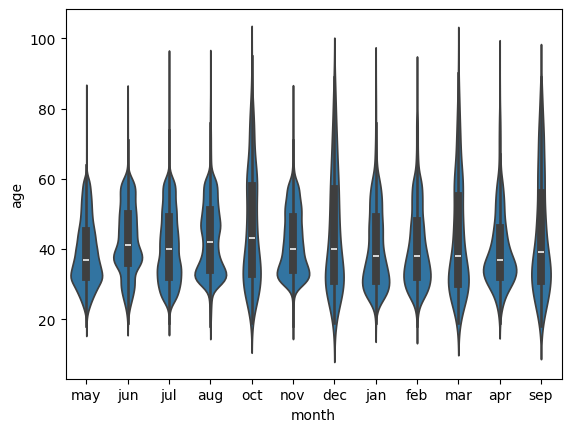

In [48]:
sns.violinplot(x='month', y='age', data=data_x)
plt.show()

ValueError: could not convert string to float: 'married'

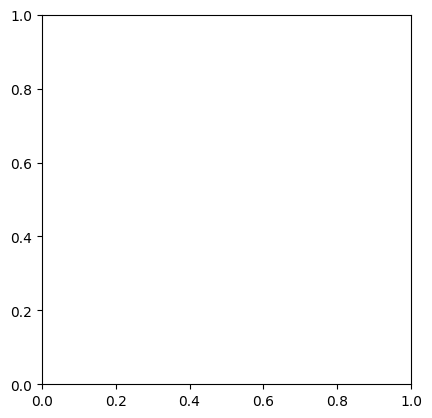

In [52]:
colors = ['green', 'yellowgreen','yellow', 'lightcoral']
plt.pie( data_x[''], colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('marital')  # Assure que le diagramme est circulaire
plt.title('Exemple de Diagramme en Secteurs')
plt.show()


In [ ]:
#liste des colonnes a valeurs categorielles
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [ ]:
#separation des variables explicatives et de la variable cible

data_x = data.drop('y', axis=1)
data_y = data['y']

In [37]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
#encodage de la colonne "job"
data_x['job_encoded'] = label_encoder.fit_transform(data['job'])

#encodage de la colonne "marital"
data_x_married_encoded = pd.get_dummies(data_x, columns=['marital'])

#encodage de la colonne "education"
data_x_education_encoded = pd.get_dummies(data_x, columns=['education'])

#encodage de la colonne "default"
data_x['default'] = label_encoder.fit_transform(data['default'])
#encodage de la colonne "housing"
data_x['housing'] = label_encoder.fit_transform(data['housing'])
#encodage de la colonne "loan"
data_x['loan'] = label_encoder.fit_transform(data['loan'])


#encodage de la colonne "contact"
data_x['contact_encoded'] = label_encoder.fit_transform(data['contact'])

#encodage de la variable "poutcome"
data_x['poutcome_encoded'] = label_encoder.fit_transform(data['poutcome'])



In [38]:
#concatenation des datasets
data_x_append= pd.concat([data_x, data_x_education_encoded], axis = 1)
print(data_x_append)


       age           job   marital  education  default  balance  housing  \
0       58    management   married   tertiary        0     2143        1   
1       44    technician    single  secondary        0       29        1   
2       33  entrepreneur   married  secondary        0        2        1   
3       47   blue-collar   married    unknown        0     1506        1   
4       33       unknown    single    unknown        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day  ... job_encoded  default_encoded  \
0         0    unknown

In [ ]:
#suppression des colonnes
data_x_append = data_x_append.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'])
print(data_x_append)


       age  balance  day month  duration  campaign  pdays  previous  poutcome  \
0       58     2143    5   may       261         1     -1         0   unknown   
1       44       29    5   may       151         1     -1         0   unknown   
2       33        2    5   may        76         1     -1         0   unknown   
3       47     1506    5   may        92         1     -1         0   unknown   
4       33        1    5   may       198         1     -1         0   unknown   
...    ...      ...  ...   ...       ...       ...    ...       ...       ...   
45206   51      825   17   nov       977         3     -1         0   unknown   
45207   71     1729   17   nov       456         2     -1         0   unknown   
45208   72     5715   17   nov      1127         5    184         3   success   
45209   57      668   17   nov       508         4     -1         0   unknown   
45210   37     2971   17   nov       361         2    188        11     other   

       job_encoded  ...  po